# De Perfecte Training Ontwerpen
## Op basis van critical power

Licentie van code en afbeeldingen definiëren.

Introductie over dit document.

## Import statements and other initialization

In [51]:
from athletic_pandas.models import Athlete, WorkoutDataFrame
from goldencheetahlib.client import GoldenCheetahClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
ARTICLE_ROOT_DIRECTORY = 'sportgericht/'

## Power Duration Models

In [42]:
time_axis = range(1, 600)
pd_data = pd.DataFrame(
    dict(
        critical_power=[300]*len(time_axis),
        power_duration_curve=[20000/t + 300 for t in time_axis]
    ),
    index=time_axis
)

Text(0,0.5,'vermogen (W)')

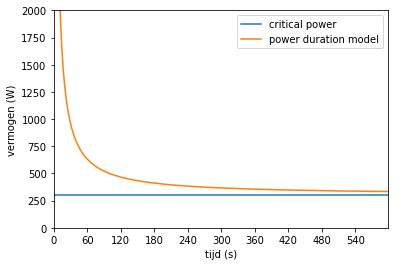

In [47]:
ax = pd_data.plot(ylim=(0,2000), xticks=range(0, 600, 60))
ax.legend(["critical power", "power duration model"]);
ax.set_xlabel('tijd (s)')
ax.set_ylabel('vermogen (W)')

## W'bal in de praktijk

In [195]:
# These lines are only needed when you actually want to retrieve this data from the GoldenCheetah REST API
# gc_client = GoldenCheetahClient('Aart')
# wdf = gc_client._request_activity_data('Aart', '2017_08_08_18_04_50.json')
# wdf = wdf.set_index(wdf.index.seconds)
# wdf.athlete = Athlete(cp=315, w_prime=18000)
# wdf = wdf.assign(w_bal=np.array(wdf.w_prime_balance()))
# cropped_wdf = wdf[1700:3000]
# cropped_wdf.to_json('20_minute_test.json')

# ...otherwise you can just load it from the '20_minute_test.json' file:

wdf = WorkoutDataFrame(pd.read_json('20_minute_test.json'))
wdf.athlete = Athlete(cp=315, w_prime=18000)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c8bbef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114819cc0>], dtype=object)

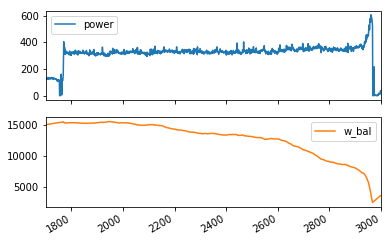

In [197]:
wdf.loc[:, ['power', 'w_bal']].plot(subplots=True)

In [201]:
wdf = wdf.assign(w_bal=wdf.w_prime_balance())